### IBM DataScience (Final Capstone Project — The Battle of Neighborhoods)
# An approach to recommend the best Cuisines & Restaurants in Kolkata 
### Project by Krishanu Podder

## -------------------------------------------------------------------------------------------------------------------------------------------------------
### Introduction

<div style="text-align: justify">
    A travel agency is a private retailer or public service that provides travel and tourism-related services to the general public on behalf of accommodation or travel suppliers. Travel agencies can provide outdoor recreation activities, airlines, car rentals, hotels, railways, travel insurance, package tours etc. For a traveller who is travelling to a new place with the help of a travel agency, the place would be new and his food habits might not match with the place. In this case a travel agency can guide or recommend the customers with information like where can the customer get his favourite dish or which places are famous for a particular type of dish. That would not only be helpful for the customers but also add to the reputation of the travel agency. Besides the travel agency can have collaboration with the good restaurants, that would be advantageous for their business.

For this project, I have taken Kolkata (India) as my target city.

Kolkata is the capital of the Indian state of West Bengal. According to the 2011 Indian census, it is the seventh most populous city in India; the city had a population of 4.5 million, while the suburb population brought the total to 14.1 million, making it the third-most populous metropolitan area in India. Located on the east bank of the Hooghly River approximately 80 kilometres west of the border with Bangladesh, it is the principal commercial, cultural, and educational centre of East India, while the Port of Kolkata is India's oldest operating port. The city nicknamed the "City of Joy" is widely regarded as the "cultural capital" of India and as of 2019, six Nobel Laureates have been associated with the city. Recent estimates of Kolkata Metropolitan Area's economy have ranged from 60 to 150 billion dollar (GDP adjusted for purchasing power parity) making it the third most-productive metropolitan area in India, after Mumbai and Delhi. 

A city filled with history and romance, Kolkata has long been viewed as the home of some of the best food in India. Much of this is to do with its past. Bengal was once ruled by the Mughals, who gave Bengali food the sweet spices, nuts and dried fruit that are characteristic of Persian rice and meat dishes. Later, Calcutta was the seat of British colonial power in India for almost 200 years. Over time, Calcutta became Kolkata and a melting pot of cultures and cuisines from around the world—Chinese, Portuguese, Armenian. They came and settled here and made the most of local ingredients to build a library of dishes, across street foods, family diners, bakeries, mishti shops and ethnic eateries.

Over last few decades Kolkata is continuously growing because of the city’s important role in government and commercial business. With it’s diverse culture , comes diverse food items. There are many restaurants in Kolkata City, each belonging to different categories like Chinese , Italian , French etc.

As part of this project , I will try to list and visualise all major parts of Kolkata City .

I will try to dig in to the data related to various cuisines, restaurants and find the answers to few questions:-

1. Which is the best location in Kolkata for Chinese Cuisine ?
2. Which areas have large number of Chinese Restaurant Market ?
3. Which areas have less number of restaurants ?
4. Which is the best place to stay if I prefer Chinese Cuisine ?
5. What places have best restaurant in Kolkata?

### Data
For this project I need the following data :
<ul>
<li> Kolkata Restaurants data that contains list Locality, Restaurant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And I will use this data set to explore various locality of Kolkata city.
     </ul>
<li> Nearby places in each locality of Kolkata city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
            <li> Description : By using this api I will get all the venues in each neighborhood. </li>

            
</div>

### Approach
- The Kolkata city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a> will be collected.
- All venues for each neighborhood will be found using FourSquare API .
- All venues that are nearby by locality will be filtered out.
- Aggregative rating will be used for each restaurant to find the best places.
- Visualizing the Ranking of neighborhoods using folium library(python)

So, Lets get started...

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

#### Reading the zomato restaurant data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KrishanuPodder/Coursera_Capstone/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Filtering out the data related to Kolkata 

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Kolkata']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18217475,Asia Kitchen by Mainland China,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393294,22.514688,"Asian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.6,Dark Green,Excellent,945
1,18249144,Hoppipola,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,1103
2,18017612,Spice Kraft,1,Kolkata,"54/1/2A, Hazra Road, Ballygunge Phari, Near Ha...",Ballygunge,"Ballygunge, Kolkata",88.364453,22.526461,"Continental, Middle Eastern, Asian",...,Indian Rupees(Rs.),No,No,No,No,3,4.8,Dark Green,Excellent,1424
3,18377112,Nawwarah,1,Kolkata,"48A, Syed Amir Ali Avenue, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,326
4,20002,6 Ballygunge Place,1,Kolkata,"6, Ballygunge Place, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.368628,22.527893,Bengali,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.4,Green,Very Good,1778


### Data Cleaning
#### removing the unwanted columns and rows from dataset

In [21]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [22]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [23]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778


#### creating map to show the restaurant clusters

In [24]:
Kolkata_Rest = folium.Map(location=[22.50, 88.40], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Kolkata_Rest)  

Kolkata_Rest

In [25]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945,3
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103,3
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424,2
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326,2
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778,2


## Q : Which places have the best restaurant in Kolkata?

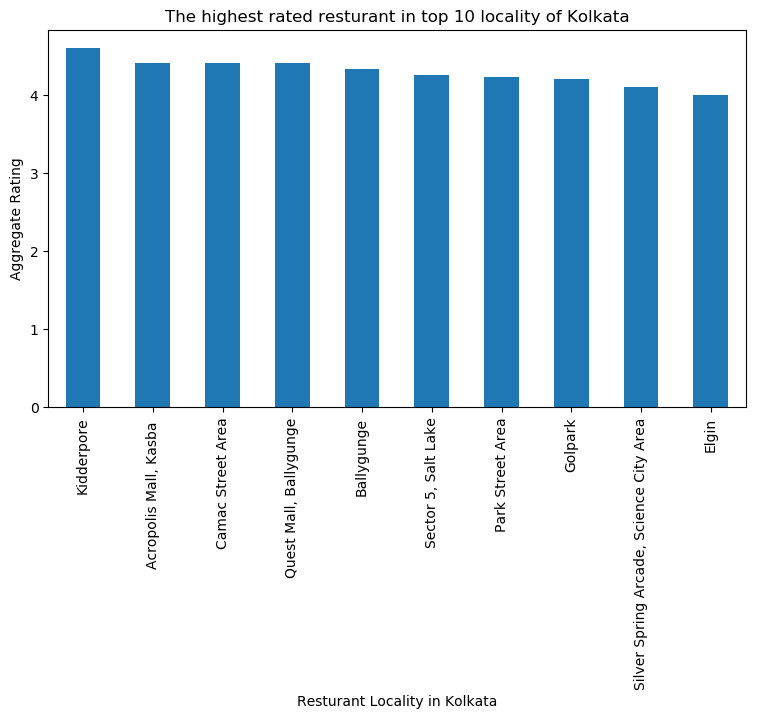

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

## Ans : The best restaurants are available in <b>Kidderpore</b>

## Q: Which places have the worst restaurants in Kolkata?

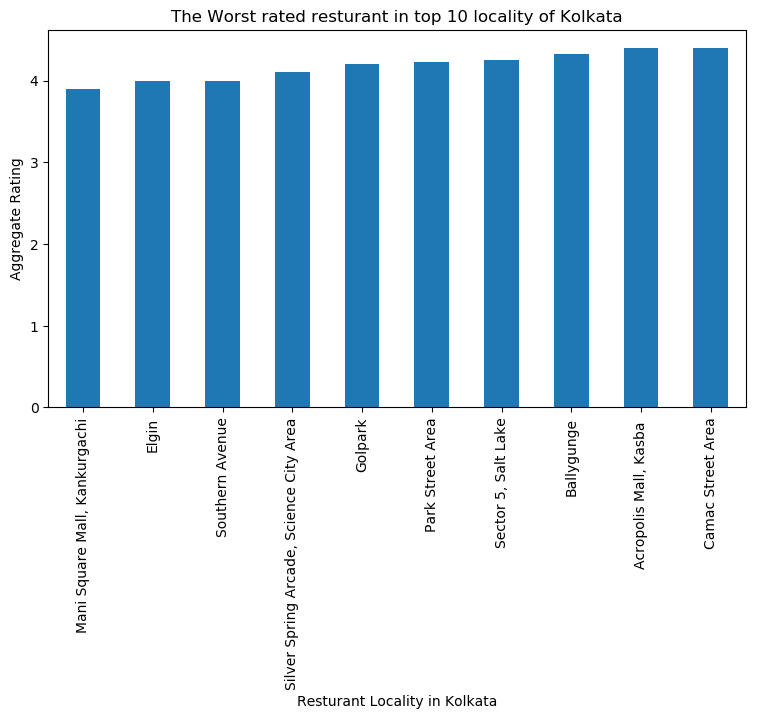

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Kolkata')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

## Ans: The worst restaurants are available in <b>Mani Square Mall, KanKurgachi</b>

## Q: Which places are suitable for a foodie in kolkata?

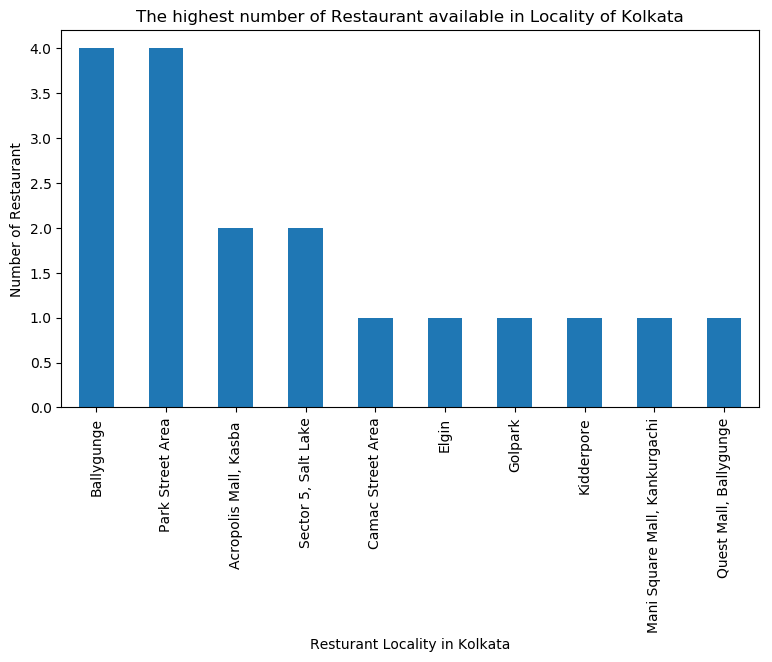

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## Ans: <b>Ballygunge</b> is the best place for a foodie to stay .

## Q: Which place is not suitable for a foodie in Kolkata?

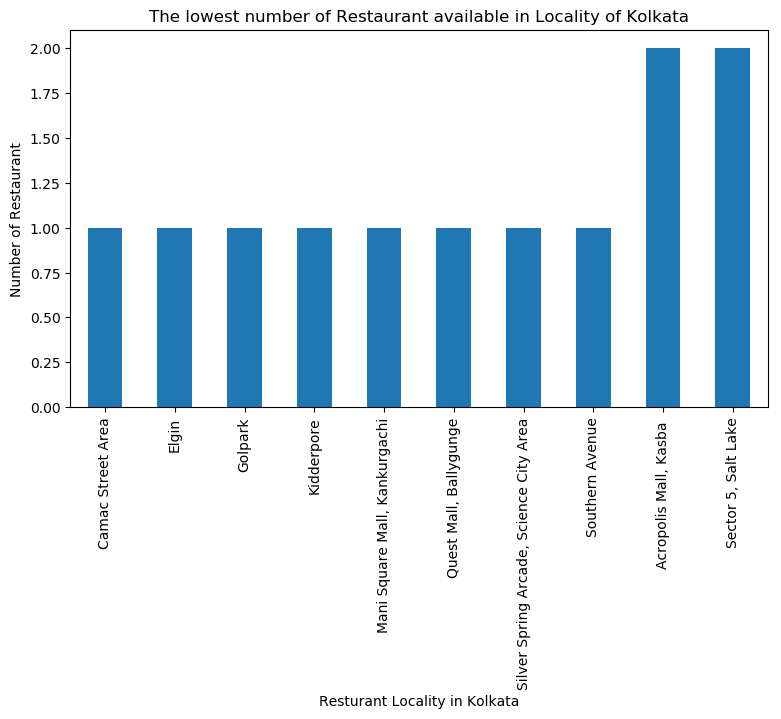

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## Ans: Camac Street Area is not suitable for a foodie in Kolkata

## Q: What are the best places for chinese restaurant in Kolkata?

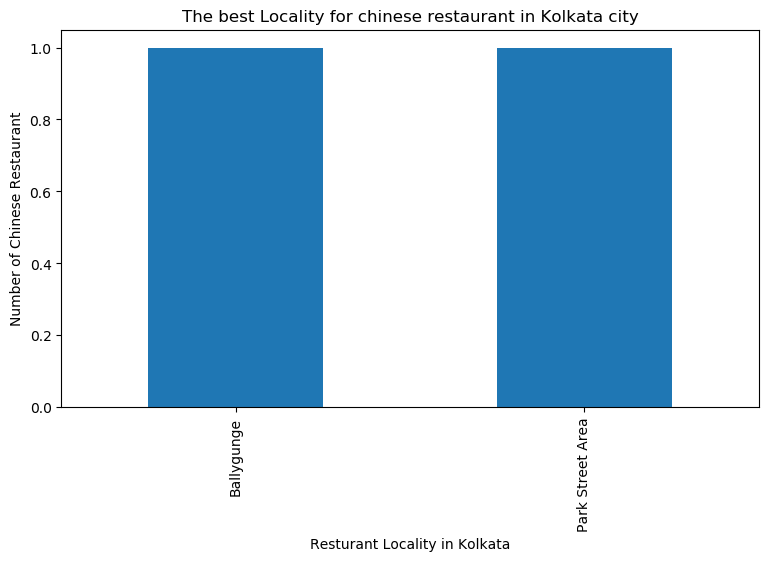

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Kolkata city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

## Ans : <b>Ballygunge and Park Street Area </b> are equally the best place for Chinese restaurant.

## Q: Which places have the best chinese restaurants in Kolkata?  

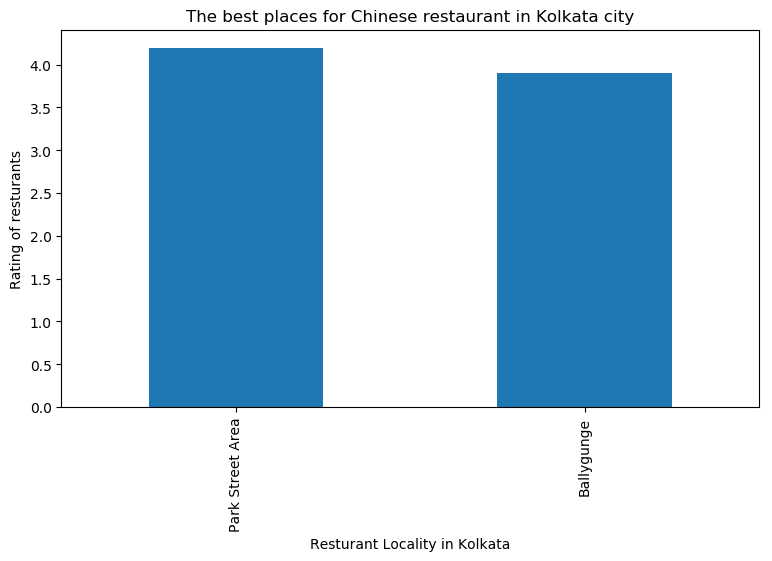

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Kolkata city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

## Ans : <b> Parkstreet Area </b> has the best Chinese restaurants.

#### Data transformation
#### Based on Locality grouping the data

In [16]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584


In [18]:
df_final.shape

(12, 8)

#### Defining Foursquare Credentials and Version

In [19]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'QWA2CYDEKZLVI1PVHE1IDR0EJKZ5UWHKMOT50WB3NKYZQOOM' # Foursquare ID
CLIENT_SECRET = 'I01NYJHPR1ZMPVAYDWAADN2ULD3TKDBWH04UES320EOBJGBE' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QWA2CYDEKZLVI1PVHE1IDR0EJKZ5UWHKMOT50WB3NKYZQOOM
CLIENT_SECRET:I01NYJHPR1ZMPVAYDWAADN2ULD3TKDBWH04UES320EOBJGBE


#### creating a function to repeat the same process to all the Locality in Kolkata

In [20]:
## create a function to repeat the same process to all the Locality in Kolkata

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### finding the venues in all Kolkata Locality

In [29]:
# find the venues in all Kolkata Locality
Kolkata_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Acropolis Mall, Kasba 
Ballygunge
Camac Street Area
Elgin
Golpark
Kidderpore
Mani Square Mall, Kankurgachi
Park Street Area
Quest Mall, Ballygunge
Sector 5, Salt Lake
Silver Spring Arcade, Science City Area
Southern Avenue


In [30]:
Kolkata_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Acropolis Mall, Kasba",22.514636,88.393302,Acropolis Mall,22.514823,88.393235,Shopping Mall
1,"Acropolis Mall, Kasba",22.514636,88.393302,Cinépolis,22.514824,88.393236,Multiplex
2,"Acropolis Mall, Kasba",22.514636,88.393302,Punjabee Rasoi,22.515974,88.392545,Dhaba
3,"Acropolis Mall, Kasba",22.514636,88.393302,Naushijaan Restaurant - Lazzat e Lucknow,22.515238,88.389958,Awadhi Restaurant
4,"Acropolis Mall, Kasba",22.514636,88.393302,KFC,22.514668,88.392230,Fried Chicken Joint


In [31]:
Kolkata_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Acropolis Mall, Kasba",9,9,9,9,9,9
Ballygunge,10,10,10,10,10,10
Camac Street Area,25,25,25,25,25,25
Elgin,21,21,21,21,21,21
Golpark,5,5,5,5,5,5
Kidderpore,4,4,4,4,4,4
"Mani Square Mall, Kankurgachi",16,16,16,16,16,16
Park Street Area,43,43,43,43,43,43
"Quest Mall, Ballygunge",18,18,18,18,18,18


In [32]:
print('There are {} uniques categories.'.format(len(Kolkata_venues['Venue Category'].unique())))

There are 55 uniques categories.


In [33]:
## Analyze Each Locality

# one hot encoding
Kolkata_onehot = pd.get_dummies(Kolkata_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Kolkata_onehot['Locality'] = Kolkata_venues['Locality'] 

# move Locality column to the first column
column_list = Kolkata_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Kolkata_onehot = Kolkata_onehot[column_list]

Kolkata_onehot.head()

,Locality,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,...,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Acropolis Mall, Kasba",0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
Kolkata_grouped = Kolkata_onehot.groupby('Locality').mean().reset_index()
Kolkata_grouped

,Locality,ATM,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,...,Seafood Restaurant,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0.00,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000000
1,Ballygunge,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.00,0.1,0.000000,0.000000,0.000000,0.0000,0.100000
2,Camac Street Area,0.00,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.120000,0.000000,0.04,0.0,0.000000,0.040000,0.000000,0.0000,0.000000
3,Elgin,0.00,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,...,0.000000,0.047619,0.000000,0.00,0.0,0.000000,0.047619,0.000000,0.0000,0.000000
4,Golpark,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000000
5,Kidderpore,0.75,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000000
6,"Mani Square Mall, Kankurgachi",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0625,0.062500
7,Park Street Area,0.00,0.000000,0.000000,0.046512,0.000000,0.046512,0.023256,0.023256,0.000000,...,0.000000,0.023256,0.046512,0.00,0.0,0.023256,0.023256,0.000000,0.0000,0.000000
8,"Quest Mall, Ballygunge",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,...,0.000000,0.055556,0.000000,0.00,0.0,0.000000,0.000000,0.055556,0.0000,0.000000
9,"Sector 5, Salt Lake",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,...,0.058824,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0000,0.000000


In [35]:
Kolkata_grouped.shape

(12, 56)

In [36]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Kolkata_grouped['Locality']:
    print("----"+hood+"----")
    temp = Kolkata_grouped[Kolkata_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acropolis Mall, Kasba ----
               venue  freq
0              Hotel  0.11
1         Restaurant  0.11
2  Awadhi Restaurant  0.11
3  Indian Sweet Shop  0.11
4          Multiplex  0.11


----Ballygunge----
                           venue  freq
0                         Bakery   0.2
1  Vegetarian / Vegan Restaurant   0.1
2                    Pizza Place   0.1
3                     Hookah Bar   0.1
4                          Dhaba   0.1


----Camac Street Area----
                venue  freq
0       Shopping Mall  0.12
1   Indian Restaurant  0.08
2    Asian Restaurant  0.08
3  Mexican Restaurant  0.08
4  Italian Restaurant  0.08


----Elgin----
                  venue  freq
0                  Café  0.14
1  Fast Food Restaurant  0.10
2   American Restaurant  0.10
3             Nightclub  0.10
4    Bengali Restaurant  0.10


----Golpark----
                venue  freq
0  Mughlai Restaurant   0.2
1  Bengali Restaurant   0.2
2                Café   0.2
3  Chinese Restaurant   0.2
4 

In [37]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Kolkata_grouped['Locality']

for ind in np.arange(Kolkata_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Kolkata_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",Indian Sweet Shop,Chinese Restaurant,Hotel,Awadhi Restaurant,Fried Chicken Joint,Shopping Mall,Dhaba,Restaurant,Multiplex,Hookah Bar
1,Ballygunge,Bakery,Vegetarian / Vegan Restaurant,Hookah Bar,Dhaba,Pizza Place,Plaza,Bengali Restaurant,Indian Sweet Shop,Sports Club,BBQ Joint
2,Camac Street Area,Shopping Mall,Café,Italian Restaurant,Hotel,Nightclub,Mexican Restaurant,Asian Restaurant,Indian Restaurant,Gastropub,Planetarium
3,Elgin,Café,American Restaurant,Nightclub,Bengali Restaurant,Fast Food Restaurant,Restaurant,Multiplex,Department Store,Plaza,Hotel
4,Golpark,Café,Chinese Restaurant,Mughlai Restaurant,Bengali Restaurant,Plaza,Hotel,Hookah Bar,Gastropub,Fried Chicken Joint,Food Court
5,Kidderpore,ATM,Awadhi Restaurant,Chinese Restaurant,IT Services,Hotel,Hookah Bar,Gastropub,Fried Chicken Joint,Food Court,Fast Food Restaurant
6,"Mani Square Mall, Kankurgachi",Café,Fast Food Restaurant,Restaurant,Theme Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Department Store,Multiplex,Chinese Restaurant,Bowling Alley
7,Park Street Area,Café,Hotel,Indian Restaurant,Nightclub,Restaurant,Fast Food Restaurant,Pizza Place,Asian Restaurant,Snack Place,Chinese Restaurant
8,"Quest Mall, Ballygunge",Indian Restaurant,Irish Pub,Plaza,Indian Sweet Shop,Italian Restaurant,Department Store,Mughlai Restaurant,Coffee Shop,Multiplex,Clothing Store
9,"Sector 5, Salt Lake",Café,Multiplex,Pizza Place,Sandwich Place,Hookah Bar,Fried Chicken Joint,Fast Food Restaurant,Dhaba,IT Services,Bengali Restaurant


In [39]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Kolkata_clustering = Kolkata_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Kolkata_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(12,)

In [40]:
# add clustering labels
Kolkata_merged = df_final.head(240)
Kolkata_merged['Cluster Labels'] = kmeans.labels_

# merge Kolkata_grouped with df_Chinese to add latitude/longitude for each Locality
Kolkata_merged = Kolkata_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Kolkata_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048,1,Indian Sweet Shop,Chinese Restaurant,Hotel,Awadhi Restaurant,Fried Chicken Joint,Shopping Mall,Dhaba,Restaurant,Multiplex,Hookah Bar
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232,3,Bakery,Vegetarian / Vegan Restaurant,Hookah Bar,Dhaba,Pizza Place,Plaza,Bengali Restaurant,Indian Sweet Shop,Sports Club,BBQ Joint
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484,1,Shopping Mall,Café,Italian Restaurant,Hotel,Nightclub,Mexican Restaurant,Asian Restaurant,Indian Restaurant,Gastropub,Planetarium
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911,1,Café,American Restaurant,Nightclub,Bengali Restaurant,Fast Food Restaurant,Restaurant,Multiplex,Department Store,Plaza,Hotel
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584,0,Café,Chinese Restaurant,Mughlai Restaurant,Bengali Restaurant,Plaza,Hotel,Hookah Bar,Gastropub,Fried Chicken Joint,Food Court


In [41]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Kolkata_merged['Lat'], Kolkata_merged['Lng'], Kolkata_merged['Locality'], Kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
## Examine Clusters

## Cluster 1
Kolkata_merged.loc[Kolkata_merged['Cluster Labels'] == 0, Kolkata_merged.columns[[1] + list(range(5, Kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,22.515082,4.2,Very Good,2584,0,Café,Chinese Restaurant,Mughlai Restaurant,Bengali Restaurant,Plaza,Hotel,Hookah Bar,Gastropub,Fried Chicken Joint,Food Court


In [43]:
## Examine Clusters

## Cluster 2
Kolkata_merged.loc[Kolkata_merged['Cluster Labels'] == 1, Kolkata_merged.columns[[1] + list(range(5, Kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22.514636,4.400,"Excellent, Very Good",2048,1,Indian Sweet Shop,Chinese Restaurant,Hotel,Awadhi Restaurant,Fried Chicken Joint,Shopping Mall,Dhaba,Restaurant,Multiplex,Hookah Bar
2,22.547186,4.400,Very Good,1484,1,Shopping Mall,Café,Italian Restaurant,Hotel,Nightclub,Mexican Restaurant,Asian Restaurant,Indian Restaurant,Gastropub,Planetarium
3,22.537960,4.000,Very Good,911,1,Café,American Restaurant,Nightclub,Bengali Restaurant,Fast Food Restaurant,Restaurant,Multiplex,Department Store,Plaza,Hotel
6,22.577821,3.900,Good,1064,1,Café,Fast Food Restaurant,Restaurant,Theme Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Department Store,Multiplex,Chinese Restaurant,Bowling Alley
7,22.552495,4.225,"Excellent, Good, Very Good",19079,1,Café,Hotel,Indian Restaurant,Nightclub,Restaurant,Fast Food Restaurant,Pizza Place,Asian Restaurant,Snack Place,Chinese Restaurant
8,22.539129,4.400,Very Good,2224,1,Indian Restaurant,Irish Pub,Plaza,Indian Sweet Shop,Italian Restaurant,Department Store,Mughlai Restaurant,Coffee Shop,Multiplex,Clothing Store
10,22.549100,4.100,Very Good,1616,1,Chinese Restaurant,Hotel,Asian Restaurant,Lounge,Bengali Restaurant,Multicuisine Indian Restaurant,Indian Restaurant,Coffee Shop,Hookah Bar,Gastropub


In [44]:
## Examine Clusters

## Cluster 3
Kolkata_merged.loc[Kolkata_merged['Cluster Labels'] == 2, Kolkata_merged.columns[[1] + list(range(5, Kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,22.538999,4.6,Excellent,1219,2,ATM,Awadhi Restaurant,Chinese Restaurant,IT Services,Hotel,Hookah Bar,Gastropub,Fried Chicken Joint,Food Court,Fast Food Restaurant


In [45]:
## Examine Clusters

## Cluster 4
Kolkata_merged.loc[Kolkata_merged['Cluster Labels'] ==3 , Kolkata_merged.columns[[1] + list(range(5, Kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,22.531687,4.325,"Excellent, Good, Very Good",4232,3,Bakery,Vegetarian / Vegan Restaurant,Hookah Bar,Dhaba,Pizza Place,Plaza,Bengali Restaurant,Indian Sweet Shop,Sports Club,BBQ Joint


In [46]:
## Examine Clusters

## Cluster 5
Kolkata_merged.loc[Kolkata_merged['Cluster Labels'] == 4, Kolkata_merged.columns[[1] + list(range(5, Kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,22.569363,4.25,"Excellent, Good",7006,4,Café,Multiplex,Pizza Place,Sandwich Place,Hookah Bar,Fried Chicken Joint,Fast Food Restaurant,Dhaba,IT Services,Bengali Restaurant
11,22.514119,4.00,Very Good,1126,4,Café,Boutique,Bakery,Coffee Shop,Park,Chinese Restaurant,Plaza,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Bar



## Conclusion 
- Ballygunge, Park Street Area are some of the best neighborhoods for Chinese cuisine. 
- Park Street, Ballygunge have the best Chinese Restaurant. 
- Ballygunge, Park street Area, Acropolis Mall Kasba are the best places for a foodie.
- Kidderpore, Acropolis Mall Kasba have best restaurants in Kolkata.

#### Cluster 1, Cluster 2, Cluster 5:
 It is most recommended for cafe.
#### Cluster 3 :
 It is most recommended for Awadhi restaurant, Chinese Restaurant.
#### Cluster 4:
 It is most recommended for Bakery & Veg restaurant.
    

## Target Client 
This technique can be implemented to make a recommender system for any travel agency that can recommend its customers about the best cuisines and restaurants of any place & hence give better service.

# This Project is Submitted by : Krishanu Podder 
(https://www.linkedin.com/in/krishanu-podder-905a9a89/)